# Introducing NLTK Basics
<img src="images/churchill.jpg" height="280" width="280" align="left">
<center>
<h3>In This Worksheet</h3> We will introduce the nltk Python module and some of its most basic but very useful operations.  <br>We will also introduce aspects of the pandas module to help us keep track of our data and quickly manipulate it.
<h3>The Data</h3> <strong>Speech, Blood Toil Tears and Sweat</strong><br><i>Sir Winston Churchill, May 13th 1940</i><br>
This is Churchill's first speech as the prime minister of Great Britain.<br>
https://www.youtube.com/watch?v=8TlkN-dcDCk
</center>

## Getting the Data
First step is always to acquire the data.  This is looking very simple here, but in reality, this can be one of the hardest parts of the process, depending on how many text you want to parse and what kind of text.  If a text has one speaker, then you can easily copy and paste.  But is that text stored in a simple file, or is the speech displayed on a web page?  

<b>Recommendation:</b> If you have to parse a web page (html) in order to get your data, try using BeautifulSoup and regular expressions

In [1]:
fp = 'speeches/Churchill-Blood.txt'
speech = open(fp).read()

Most of the time, we will just want to convert a text to lowercase for ease of use purposes.  In Python, 'Hello' != 'hello', since 'H' != 'h', and that could mess up some of our counts ahead.

In [2]:
speech=speech.lower()
print('This speech has %d characters.' % (len(speech)))
speech

This speech has 3455 characters.


'on friday evening last i received from his majesty the mission to form a new administration. it was the evident will of\' parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties.\ni have already completed the most important part of this task.\na war cabinet has been formed of five members, representing, with the labour, opposition, and liberals, the unity of the nation. it was necessary that this should be done in one single day on account of the extreme urgency and rigor of events. other key positions were filled yesterday. i am submitting a further list to the king tonight. i hope to complete the appointment of principal ministers during tomorrow.\nthe appointment of other ministers usually takes a little longer.\n\ni trust when parliament meets again this part of my task will be completed and that the administration will be complete in all respects. i considered it in the public interest to suggest to the speaker

Alright!  Text!  Now let's get right to it.  Let's use some nltk!<br>
<strong>Presentation- introduce parsing concepts</strong>

## Tokenizing the Data

One of the first things we likely want to do is break our speech up into sentences.  That way, we can take this thought by thought as we process the data.  So let's import... <b>sent_tokenize</b>

In [4]:
from nltk import sent_tokenize

<b>sent_tokenize</b> allows us to take a text and break it up.  The function takes two arguments: text and language, though it assumes the language is english unless told otherwise.

In [5]:
help(sent_tokenize)

Help on function sent_tokenize in module nltk.tokenize:

sent_tokenize(text, language='english')
    Return a sentence-tokenized copy of *text*,
    using NLTK's recommended sentence tokenizer
    (currently :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into sentences
    :param language: the model name in the Punkt corpus



So, let's tokenize this data by sentence!  Super easy, see below!  Notice that though the data is split up based on punctuation, the punctuation is retained in each sentence.

In [8]:
sentences = sent_tokenize(speech)
sentence_lengths = []
for sentence in sentences:
    sentence_lengths.append(len(sentence))
    print(sentence)

on friday evening last i received from his majesty the mission to form a new administration.
it was the evident will of' parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties.
i have already completed the most important part of this task.
a war cabinet has been formed of five members, representing, with the labour, opposition, and liberals, the unity of the nation.
it was necessary that this should be done in one single day on account of the extreme urgency and rigor of events.
other key positions were filled yesterday.
i am submitting a further list to the king tonight.
i hope to complete the appointment of principal ministers during tomorrow.
the appointment of other ministers usually takes a little longer.
i trust when parliament meets again this part of my task will be completed and that the administration will be complete in all respects.
i considered it in the public interest to suggest to the speaker that th

In [9]:
print('The average number of characters in a sentence is ', sum(sentence_lengths)/len(sentence_lengths))

The average number of characters in a sentence is  94.97222222222223


Alright, sentences are important, no doubt.  But the <i>real</i> power is in the words!  So how do we pull words out of a text?  With <b>word_tokenize</b>! (Duh)

In [11]:
from nltk import word_tokenize

for sentence in sentences:
    print(sentence)
    print(word_tokenize(sentence))
    print()

on friday evening last i received from his majesty the mission to form a new administration.
['on', 'friday', 'evening', 'last', 'i', 'received', 'from', 'his', 'majesty', 'the', 'mission', 'to', 'form', 'a', 'new', 'administration', '.']

it was the evident will of' parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties.
['it', 'was', 'the', 'evident', 'will', 'of', "'", 'parliament', 'and', 'the', 'nation', 'that', 'this', 'should', 'be', 'conceived', 'on', 'the', 'broadest', 'possible', 'basis', 'and', 'that', 'it', 'should', 'include', 'all', 'parties', '.']

i have already completed the most important part of this task.
['i', 'have', 'already', 'completed', 'the', 'most', 'important', 'part', 'of', 'this', 'task', '.']

a war cabinet has been formed of five members, representing, with the labour, opposition, and liberals, the unity of the nation.
['a', 'war', 'cabinet', 'has', 'been', 'formed', 'of', 'five', 'm

For now, though, let's convert the entire speech into one list of tokens.

In [14]:
words = word_tokenize(speech)
print('There are %d words in this speech.' % (len(words)))

There are 698 words in this speech.


## Turning Data into a Text
<b>nltk.Text</b> is an object that takes a list of tokens and makes certain functions available to it.  We will create a Text object and then step through each of these functions (not necessarily in this order):
* .common_context()
* .concordance()
* .count()
* .dispersion_plot()
* .plot()
* .similar()
* .vocab()

First let's just initialize our Text object.  We can hand it our tokenized words list.

In [15]:
from nltk import Text

text = Text(words)

You <i>must</i> give a tokenized word list.  If you give just the string version of the speech, you will get a character split going.

In [16]:
ex = Text('Hello my name is Emily.'.lower())
print(ex)

<Text: h e l l o   m y...>


Now to the good stuff!
### What are the most common words in my text?

Getting the number of time a word appears in a text is easy.  It acts just like the count method for a Python list.

In [17]:
text.count('british')

2

But what if I want to discover the counts of all of the words and find significant ones?

First off, I can just plot my vocabulary with <b>Text.plot()</b>.

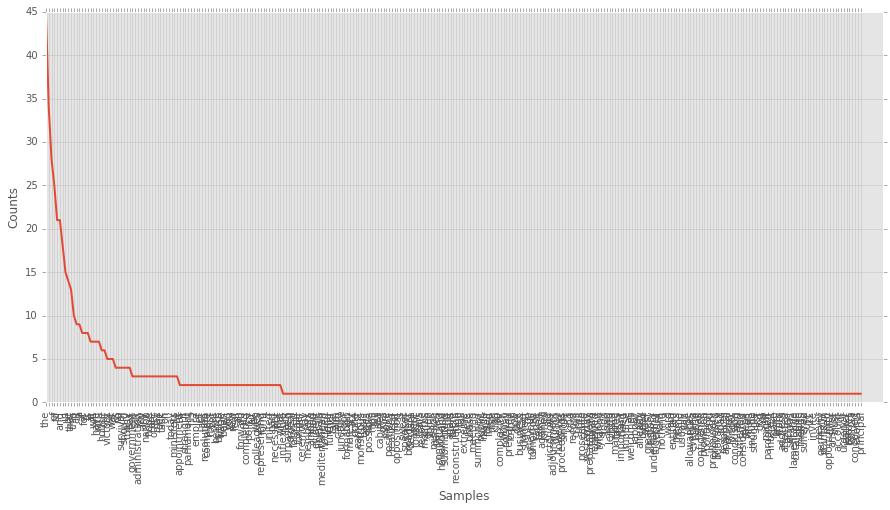

In [18]:
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

plt.figure(figsize=(15,7))

text.plot()

This is not very readable, though.  It does tell me that I have some extremely high frequency words, and then most words only appear 1 or 2 times throughout the text. 

If I want to get more into the words and counts themselves, <b>Text.vocab()</b> will create a FreqDist object that holds basically a dictionary of tokens and counts (but this dictionary is special).

In [85]:
print(text.vocab())
print(text.vocab().keys())
print('Count of grievous:',text.vocab()['grievous'])

<FreqDist with 293 samples and 698 outcomes>
dict_keys(['grievous', 'i', 'terrors', 'five', 'history', 'submitting', 'respects', 'monstrous', 'ceremony', 'if', 'little', 'greatest', 'holland-and', 'shall', 'tonight', 'welcomes', 'urge', 'house', 'cause', 'my', 'interest', 'tyranny', 'kind', 'majesty', 'given', 'new', 'make', 'were', 'the', 'stood', 'move', 'public', 'address', 'events', 'former', 'of', 'against', 'spite', 'today', 'sweat', 'with', 'time', 'complete', 'adjournment', 'home', 'go', 'mission', 'many', '.', 'ages', 'air', "'s", 'points-in', 'necessary', 'may', 'business', 'juncture', 'labour', 'friday', 'at', 'serious', 'broadest', 'do', 'hope', 'liberals', 'our', 'not', 'nation', 'list', 'possible', ',', 'reconstruction', 'invite', 'word', 'king', 'earliest', 'phase', 'which', 'representing', 'administration', 'aim', 'or', 'form', 'continuing', 'during', 'you', 'germany', 'crisis', 'goal', 'lack', 'will', 'offer', 'most', 'any', 'never', 'on', 'victory', 'am', 'declare', '

In order to get an idea of how diverse the text's vocabulary is, we can do a simple calculation of the ratio of number of unique words to the number of total words.

In [159]:
diversity = len(text.vocab())/len(text.tokens)
print(diversity)

0.4197707736389685


Moving on, we just mention that his FreqDist object is no mere dictionary...

This FreqDist object will grab most common values for us!

In [88]:
text.vocab().most_common()

[('the', 45),
 ('.', 34),
 (',', 28),
 ('of', 25),
 ('to', 21),
 ('and', 21),
 ('i', 18),
 ('in', 15),
 ('be', 14),
 ('that', 13),
 ('this', 10),
 ('all', 9),
 ('a', 9),
 ('at', 8),
 ('is', 8),
 ('for', 8),
 ('with', 7),
 ('will', 7),
 ('have', 7),
 ('it', 7),
 ('house', 6),
 ('our', 6),
 ('victory', 5),
 ('we', 5),
 ('war', 5),
 ('many', 4),
 ('survival', 4),
 ('has', 4),
 ('no', 4),
 ('us', 4),
 ('should', 4),
 ('my', 3),
 ('today', 3),
 ('may', 3),
 ('hope', 3),
 ('nation', 3),
 ('administration', 3),
 ('any', 3),
 ('on', 3),
 ("''", 3),
 ('are', 3),
 ('one', 3),
 ('government', 3),
 ('say', 3),
 ('ministers', 3),
 ('by', 3),
 ('task', 3),
 ('other', 3),
 ('if', 2),
 ('new', 2),
 ('complete', 2),
 ('air', 2),
 ('necessary', 2),
 ('not', 2),
 ('representing', 2),
 ('form', 2),
 ('you', 2),
 ('most', 2),
 ('before', 2),
 ('ask', 2),
 ('resolution', 2),
 ('was', 2),
 ('?', 2),
 ('empire', 2),
 ('what', 2),
 ('who', 2),
 ('policy', 2),
 ('let', 2),
 ('british', 2),
 ('united', 2),
 ('pa

In [89]:
text.vocab().most_common(10)

[('the', 45),
 ('.', 34),
 (',', 28),
 ('of', 25),
 ('to', 21),
 ('and', 21),
 ('i', 18),
 ('in', 15),
 ('be', 14),
 ('that', 13)]

One annoying thing here is that we get 'the' as a top word... we don't want to separate all of these words that we don't really consider significant to the meaning of our text.  Nltk has a default list of stopwords that we can use for English!

In [20]:
from nltk.corpus import stopwords

stops = stopwords.words('english').copy()
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [21]:
no_stop_tokens = [word for word in text.tokens if word not in stops]
text_no_stops = Text(no_stop_tokens)
text_no_stops.vocab().most_common(10)

[('.', 34),
 (',', 28),
 ('house', 6),
 ('victory', 5),
 ('war', 5),
 ('survival', 4),
 ('many', 4),
 ('us', 4),
 ('government', 3),
 ('say', 3)]

Let's add punctuation to our 'stop words', aka, tokens that can be ignored.

In [22]:
import string
print(string.punctuation)

stops.extend(list(string.punctuation))
no_stop_tokens = [word for word in text.tokens if word not in stops]
text_no_stops = Text(no_stop_tokens)
text_no_stops.vocab().most_common(10)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[('house', 6),
 ('victory', 5),
 ('war', 5),
 ('survival', 4),
 ('many', 4),
 ('us', 4),
 ('government', 3),
 ('say', 3),
 ('administration', 3),
 ('hope', 3)]

Oh!  And we can easily plot this!

<b>Fun notebook tip:</b> The plots all use matplotlib.  IPython Notebook gives you the option to display plots inline, which most prefer.  You can do so with '%matplotlib inline'.  You can also make plots prettier with matplotlib.style.use('ggplot').

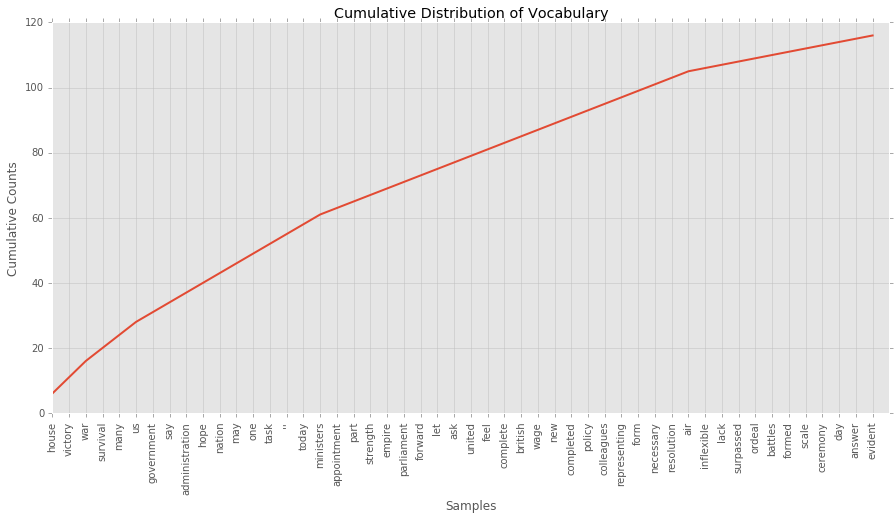

In [23]:
plt.figure(figsize=(15,7))

text_no_stops.vocab().plot(50, cumulative=True, title='Cumulative Distribution of Vocabulary')

### How do I learn more about the seemingly significant words in my text?
Back to the Text object, there are several methods that allow us to learn more about the role of a word in a text. 

### Where do my top words appear?
The <b>Text.concordance()</b> method allows us to see a word as it appears in the text.  Let's look at some of the top words in our text to see how they appear.

In [109]:
text.concordance('house')

Displaying 6 of 6 matches:
t to suggest to the speaker that the house should be summoned today . at the en
proceedings , the adjournment of the house will be proposed until may 21 with p
liest opportunity . i now invite the house by a resolution to record its approv
ment . the resolution : '' that this house welcomes the formation of a governme
 be pardoned if 1 do not address the house at any length today , and i hope tha
been necessary to act . i say to the house as i said to ministers who have join


In [110]:
text.concordance('victory')

Displaying 5 of 5 matches:
 ? i can answer in one word . it is victory . victory at all costs - victory in
nswer in one word . it is victory . victory at all costs - victory in spite of 
is victory . victory at all costs - victory in spite of all terrors - victory ,
- victory in spite of all terrors - victory , however long and hard the road ma
 hard the road may be , for without victory there is no survival . let that be 


In [111]:
text.concordance('war')

Displaying 5 of 5 matches:
 most important part of this task . a war cabinet has been formed of five membe
esolve of the nation to prosecute the war with germany to a victorious conclusi
t is our policy ? i say it is to wage war by land , sea , and air . war with al
to wage war by land , sea , and air . war with all our might and with all the s
rength god has given us , and to wage war against a monstrous tyranny never sur


We can also see when these words appear in the text to get an idea of their sequence and relationships using the <b>Text.dispersion_plot()</b> method.

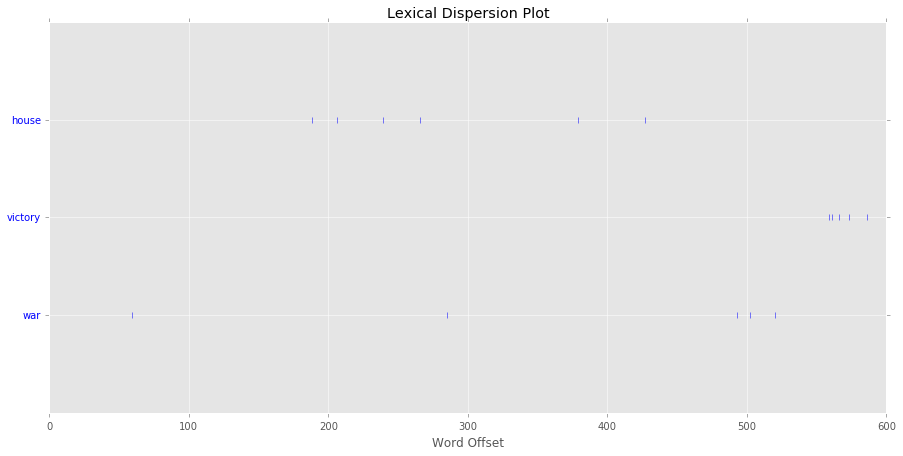

In [24]:
plt.figure(figsize=(15,7))

text.dispersion_plot(['house','victory','war'])

### What words are used in similar ways?
#### Contexts
In nltk, the 'context' of a word signifies the words that surround it when it occurs.
For learning purposes, let's call concordance on 'house' and then see how our context lines up.

In [135]:
text.concordance('house')

Displaying 6 of 6 matches:
t to suggest to the speaker that the house should be summoned today . at the en
proceedings , the adjournment of the house will be proposed until may 21 with p
liest opportunity . i now invite the house by a resolution to record its approv
ment . the resolution : '' that this house welcomes the formation of a governme
 be pardoned if 1 do not address the house at any length today , and i hope tha
been necessary to act . i say to the house as i said to ministers who have join


In [136]:
contexts = nltk.ContextIndex(text.tokens)
contexts._word_to_contexts['house']

FreqDist({('the', 'as'): 1,
          ('the', 'at'): 1,
          ('the', 'by'): 1,
          ('the', 'should'): 1,
          ('the', 'will'): 1,
          ('this', 'welcomes'): 1})

The <b>Text.similar()</b> method can help us find words that might not appear as frequently as our word, but they appear in a similar context and thus might be related.

In [137]:
text.similar('house')

administration evident


In [144]:
print(text.concordance('administration'))
print()
print(contexts._word_to_contexts['administration'].items())

Displaying 3 of 3 matches:
                                administration . it was the evident will of ' 
 will be completed and that the administration will be complete in all respect
ious conclusion . '' to form an administration of this scale and complexity is
None

dict_items([(('the', 'will'), 1), (('an', 'of'), 1), (('new', '.'), 1)])


In [145]:
print(text.concordance('evident'))
print()
print(contexts._word_to_contexts['evident'].items())

Displaying 1 of 1 matches:
m a new administration . it was the evident will of ' parliament and the nation
None

dict_items([(('the', 'will'), 1)])


This shows how while the similar command is very interesting, it doesn't always tell you something useful.  Both of these words were considered similar to 'house' because they also had the context ('the','will').  But here is a <b>great</b> example of a huge challenge in natural language processing.  <i>Will</i> can be a noun or a verb.  When we got 'administration' as a similar word, it was truly found in the same context; the administration was acting.  But evident was actually an adjective describing the noun will.  Sorting out these differences is <i>very</i> difficult.

Another method that uses context is <b>Text.common_contexts()</b>.  This is sort of the inverse of Text.similar().  common_contexts will return the common context of a list of words.

In [147]:
text.common_contexts(['evident','house'])

the_will


In [148]:
text.common_contexts(['evident','house','administration'])

the_will


### What are some signifcant phrases I should know?
My favorite method of nltk.Text is <b>Text.collocations</b>.  Collocations are expressions of multiple words which commonly co-occur.  The Text has a pretty simple collocations() method, though in reality, it wraps around a highly customizable object, nltk.BigramCollocationFinder.

Text.collocations() will look for words that commonly occur in the same window, skipping stop words (thanks!).  The default window size is 2.  If we call the basic method, we get a pretty useful output.

In [165]:
text.collocations()

british empire; wage war


Crazy!  We immediately get two incredibly relevant bigrams out of this.  We can extend the window to get more information.

In [166]:
text.collocations(window_size=4)

many months; british empire; appointment ministers; form
administration; part task; wage war


In [168]:
text.collocations(window_size=6)

friends colleagues; many months; many struggle; british empire;
victory costs; appointment ministers; form administration; part task;
survival british; wage war; house today; victory victory


<a href="http://www.history.com/this-day-in-history/churchill-announces-i-have-nothing-to-offer-but-blood-toil-tears-and-sweat">History.com summarizes the speech as such:</a><br>
<i>On this day in 1940, as Winston Churchill takes the helm as <b>Great Britain</b>’s new prime minister, he assures Parliament that his new policy will consist of nothing less than “to <b>wage war</b>, by sea, land and air, with all our might and with all the strength that God can give us; to wage war against a monstrous tyranny, never surpassed in the dark, lamentable catalogue of human crime.”</i>

How do we line up?

## What Can We Quickly Learn?
If given a new text, not even just a speech, we can quickly try to get a good sense of what is in that text.  Let's try doing this really quickly with another one of Churchill's speeches, "We Shall Fight On the Beaches."

In [170]:
fp = 'speeches/Churchill-Beaches.txt'
speech = open(fp).read().lower()
words = word_tokenize(speech)
text = Text(words)

In [185]:
print('Diversity of words score:', len(text.vocab())/len(text.tokens))

Diversity of words score: 0.45714285714285713


In [172]:
text.collocations(window_size=6)

shall fight; growing strength; defend island; fight growing


In [188]:
words_no_stops = [word for word in text.tokens if word not in stops]
text_no_stops = Text(words_no_stops)
text_no_stops.vocab().most_common(10)

[('shall', 12),
 ('fight', 7),
 ('defend', 3),
 ('island', 3),
 ('empire', 2),
 ('growing', 2),
 ('good', 2),
 ('large', 2),
 ('confidence', 2),
 ('old', 2)]

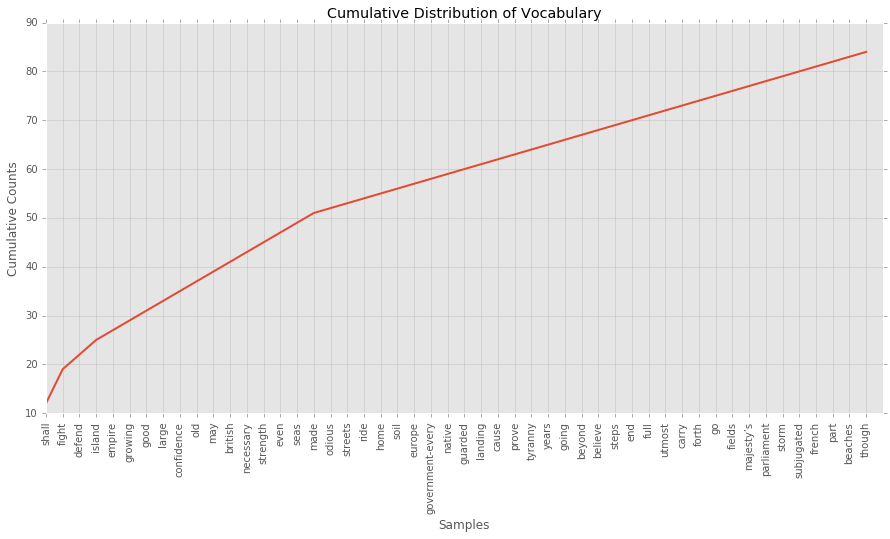

In [190]:
plt.figure(figsize=(15,7))

text_no_stops.vocab().plot(50, cumulative=True, title='Cumulative Distribution of Vocabulary')

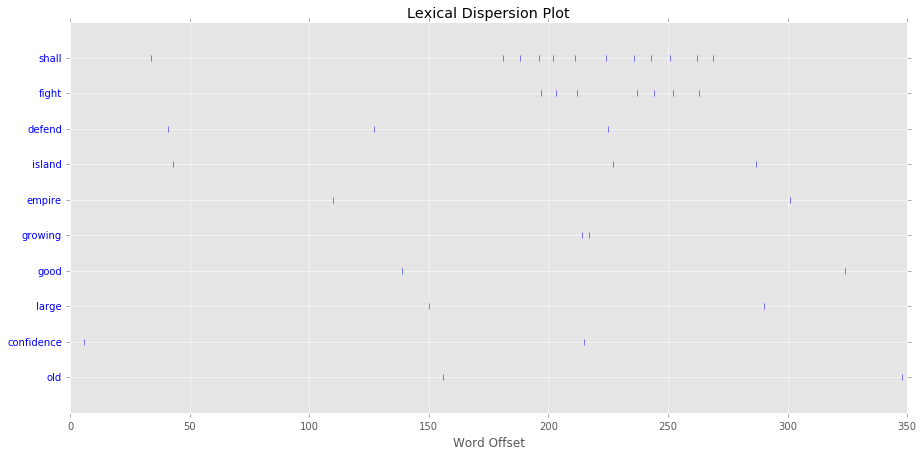

In [192]:
plt.figure(figsize=(15,7))

top_words = [word for word,count in text_no_stops.vocab().most_common(10)]
text.dispersion_plot(top_words)

-----------